## Reading the DHS + Nightlights dataset

**Incase DHS + Nightlights data isn't generated,** please follow the steps [below](#generating_dataset) for generating the dataset.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
dhs_nightlights_df = pd.read_csv("../data/DHS_Nightlights/Rwanda/DHS_Nightlights_data.csv")

In [3]:
dhs_nightlights_df.head()

,Cluster Number,Mean_nightlight,Wealth Score
0,1.0,0.06,-0.386620
1,2.0,0.00,-0.421574
2,3.0,0.00,-0.449724
3,4.0,0.00,-0.390006
4,5.0,0.00,-0.416924


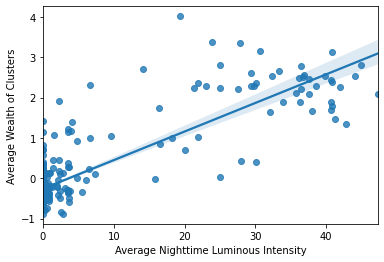

In [4]:
sns.regplot(x = "Mean_nightlight", y = "Wealth Score", data = dhs_nightlights_df);
plt.xlabel("Average Nighttime Luminous Intensity");
plt.ylabel("Average Wealth of Clusters");
# plt.savefig('../graphs/Rwanda/wealthscore_luminosity.png')

<AxesSubplot:>

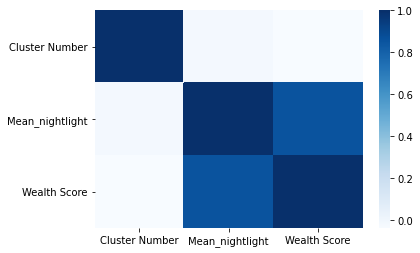

In [26]:
sns.heatmap(dhs_nightlights_df.corr(), cmap='Blues')

The graphs suggest that brighter areas tend to be more richer. But, we would need something more than a visual representation to find if there exists a correlation between these.

In [13]:
corr_df = dhs_nightlights_df.corr()
styledcorr_df = corr_df.style.applymap(lambda x : 'color: blue' if 0 < x < 1 else 'color: grey')
styledcorr_df

,Cluster Number,Mean_nightlight,Wealth Score
Cluster Number,1.000000,-0.016677,-0.038041
Mean_nightlight,-0.016677,1.000000,0.860132
Wealth Score,-0.038041,0.860132,1.000000


In [14]:
print('R-Squared = ', (corr_df['Mean_nightlight']['Wealth Score'])**2)

R-Squared =  0.7398266320074807


This does prove that Mean nightlight intensity and wealth scores are correlated and about 73% of variance in wealth score is explained by the variance in mean nightlight intensity.

**But, let's use statsmodels to get a better idea of deterministic and inferential statistics.**

In [10]:
X = dhs_nightlights_df['Mean_nightlight']
X = sm.add_constant(X)
y = dhs_nightlights_df['Wealth Score']

"An intercept is not included by default and should be added by the user. See statsmodels.tools.add_constant." - [Source](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html)

In [11]:
lin_model = sm.OLS(y, X).fit()

In [12]:
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Wealth Score   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1393.
Date:                Thu, 04 Feb 2021   Prob (F-statistic):          2.30e-145
Time:                        12:06:01   Log-Likelihood:                -278.05
No. Observations:                 492   AIC:                             560.1
Df Residuals:                     490   BIC:                             568.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2602      0.020    -12.699      0.000      -0.300      -0.220
Mean_nightlight     0.0709      0.002     37.328      0.000       0.067       0.075
==============================================================================
Omnibus:                      245.303   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2311.885
Skew:                           1.951   Prob(JB):                         0.00
Kurtosis:                      12.877   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='generating_dataset'></a>

## Generating DHS + Nightlights dataset

Importing DHS Survey data and nightlights features

In [ ]:
# Magic commands to enable autoreload of imported packages
%load_ext autoreload
%autoreload 2

In [ ]:
from poverty_predictor.get_dhsdata import GetDHSData
from poverty_predictor.merge_dataframes import merge_dhs, merge_night_dhs

Fetching DHS data

In [ ]:
data = GetDHSData('../data/GPS/RWGE61FL.shp', '../data/Survey/RWHR61FL.dta')
gps_data = data.gps_df()
survey_data = data.survey_df()

In [ ]:
dhs_data = merge_dhs(gps_data, survey_data)

Creating nightlight features and combining these features with DHS data

In [ ]:
tiff_path = "../data/Nightlights/F182010.v4d_web.stable_lights.avg_vis.tif"
nightlight_dhs_df = merge_night_dhs(dhs_data, tiff_path)

Saving the combined dataframe in csv format.

In [ ]:
nightlight_dhs_df.to_csv("../data/DHS_Nightlights/DHS_Nightlights_data.csv", index=False)